In [2]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
df = pd.read_csv("../data/consumer/conductivity_data.csv")
display(df)
values = df["Value"].values[::4][100:]

samples = 60*24
X = []
for i in range(int(len(values)/samples)):
    X.append(values[i*samples:(i+1)*samples])

,Timestamp,Value
0,2021-02-24 00:00:00,9212.88900
1,2021-02-24 00:00:15,9210.90605
2,2021-02-24 00:00:30,9208.92310
3,2021-02-24 00:00:45,9206.94015
4,2021-02-24 00:01:00,9204.95720
...,...,...
207355,2021-03-31 23:58:45,5931.60400
207356,2021-03-31 23:59:00,5931.60400
207357,2021-03-31 23:59:15,5931.60400
207358,2021-03-31 23:59:30,5931.60400


In [69]:
df = pd.read_csv("../data/consumer/braila_test.csv")
display(df)
values = df["analog2"].values

samples = 4*24
X = []
for i in range(int(len(values)/samples)):
    X.append(values[i*samples:(i+1)*samples])
print(i)

,timestamp,analog2,tot1,tot2
0,2019-10-21 13:30:00,0.819333,452506.864000,-285.31
1,2019-10-21 13:45:00,0.821333,452521.260667,-285.31
2,2019-10-21 14:00:00,0.820000,452535.552000,-285.31
3,2019-10-21 14:15:00,0.820000,452551.006000,-285.31
4,2019-10-21 14:30:00,0.814667,452564.722667,-285.31
...,...,...,...,...
15624,2020-04-01 07:30:00,0.818000,797057.012000,-293.97
15625,2020-04-01 07:45:00,0.811333,797090.365333,-293.97
15626,2020-04-01 08:00:00,0.815333,797123.492000,-293.97
15627,2020-04-01 08:15:00,0.814667,797158.222000,-293.97


160


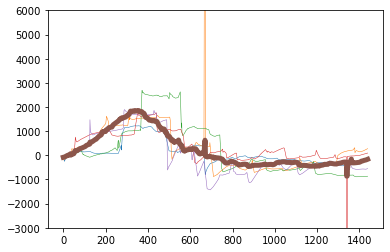

In [78]:
for i in range(15, 20):
    plt.plot(np.array(X[i]) - np.average(X[i][:50]), lw = 0.5)
plt.ylim([-3000, 6000])

plt.plot(np.average(X, axis = 0) - np.average(np.average(X, axis = 0)[:50]), lw = 5)

In [79]:
pca = PCA(n_components=4)
pca.fit(X)

X_transformed = pca.transform(X)

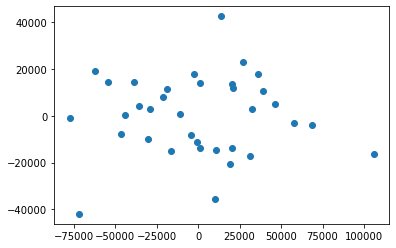

In [80]:
plt.scatter(X_transformed[:,0], X_transformed[:,1])

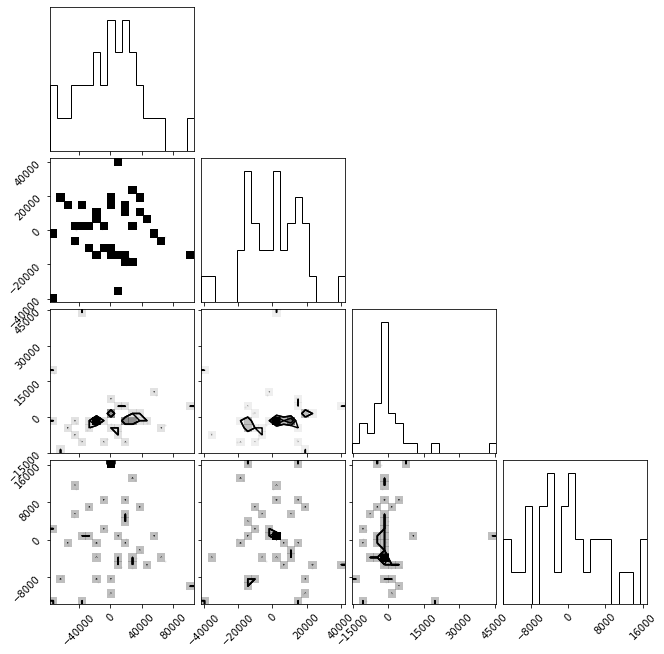

In [81]:
import corner

figure = corner.corner(X_transformed)
figure.savefig("corner.png")